<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **DBSCAN**


Estimated time needed: **30** minutes


Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering.

## Use cases of DBSCAN:

*   **Recommender systems** that make recommendations to users based on preferences (such as Netflix viewing patterns) of similar users (such as neighbors).
*   **Anomaly detection** that identifies rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behavior.
*   **Customer segmentation** that aims at separating customers into multiple clusters, and devise targeted marketing strategy based on each cluster's characteristics.


## When is DBSCAN better than K-Means?

You are a Data Scientist working for a retail company, and the marketing team wants you to use Data Science techniques to divide the company's customer base into groups of individuals that are similar in specific aspects such as age, gender, and spending behavior, so that they could devise targeted marketing strategy for each group based on its average spending on various product categories.

In this case, since you don't know what would be the optimal number of groups/clusters to look for in the customer base, you can't use K-Means as it requires you to specify the number of clusters.

Besides, since the marketing team wants to understand the average spendings of each group in order to devise its corresponding promotion, we should use an algorithm that's more robust to outliers.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/marketing.jpg" style="width: 70%">

Image from [PxHere](https://pxhere.com/en/photo/1448601?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


In this notebook, we will look at a clustering technique using DBSCAN, which help us overcome the two aforementioned shortcomings of the K-Means clustering. Also, we will be able to look at the handwriting example to prove whether someones handwriting is bad, using DBSCAN.


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Background">Background</a>
        <ol>
            <li><a href="https://#How-does-DBSCAN-work?">How does DBSCAN work?</a></li>
        </ol>
    </li>
    <li><a href="https://#Visual-Example">Example 1: Visual Example</a></li>
    <li><a href="https://#Proving-Your-Friend-Has-Bad-Handwriting">Example 2: Proving your friend has bad handwriting</a></li>
</ol>

<a href="https://#Exercises">Exercises</a>

<ol>
    <li><a href="https://#Exercise-1---Find-the-number-of-clusters">Exercise 1 - Find the number of clusters</a></li>
    <li><a href="https://#Exercise-2---Find-the-%-of-data-marked-as-noise">Exercise 2 - Find the % of data marked as noise</a></li>
    <li><a href="https://#Exercise-3---Visualize-the-clustered-data-using-matplotlib.pyplot">Exercise 3 - Visualize the clustered data using matplotlib.pyplot</a></li>
</ol>


***


## Objectives


After completing this lab you will be able to:


*   **Explain** what DBSCAN does and how it works.
*   **Understand** the strengths, weaknesses, and use cases of DBSCAN.


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for visualizing the data.
*   [`scipy`](https://docs.scipy.org/doc/scipy/reference/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for complex numerical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ..."

### Importing Required Libraries


In [1]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

## Background

**DBSCAN** is a clustering algorithm that stands for:

"**D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise"

*   *Density-Based* - DBSCAN will group points that are densely-packed together
*   *Spacial-Clustering* - DBSCAN is for numerical points $\in \mathbb{R}^n$
*   *Applications with Noise* - DBSCAN is great for applications that have noise
    *   This is because DBSCAN also finds outliers/noise in data


### How does DBSCAN work?

**DBSCAN** uses two parameters:

*   `eps` (aka epsilon - $\epsilon$) - the max distance between two points for them to be considered "in the same neighborhood"
*   `min_samples` - the minimum number of neighbors a point needs to be considered a **core point**.

If a point is a neighbor of a **core point**, then it's in the same cluster as that point.

Otherwise, it's considered to be **noise**.

#### Additional Resources

You're encouraged to take a look at the [Pseudocode for DBSCAN](https://www.researchgate.net/figure/Pseudocode-of-the-DBSCAN-algorithm_fig2\_325059373?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) if a more in-depth understanding is desired.

[The original DBSCAN paper ](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) hosted by [aaai.org](https://www.aaai.org/).


## Visual Example

Let's begin with a visual example that demonstrates how DBSCAN works.

Load the dataset `grid.csv` into a DataFrame:


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/example1.csv')
df.head(n=6)

,0,1
0,-3,0
1,0,-3
2,0,0
3,0,3
4,3,0
5,6,0


We can see the dataset is a small handful of points $3$ units apart:


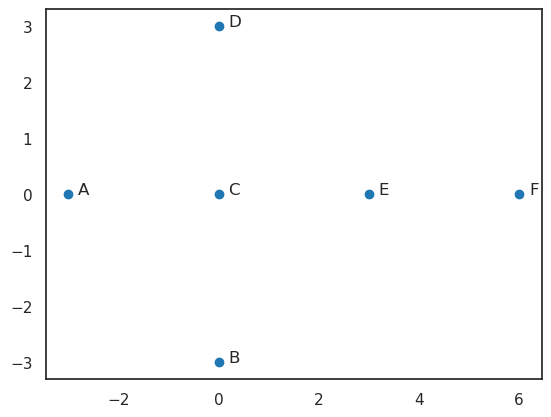

In [3]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.scatter(df['0'], df['1'])
for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()

We apply the DBSCAN algorithm with:

*   `eps=3`
*   `min_samples=4`

Lets think about what should happen:

*   The point $C$ is the only point that has `min_samples=4` or more points within a distance of `eps=3`.
    *   This makes $C$ the only **core** point in the dataset.
*   Points $A$, $B$, $D$, and $E$ are within `eps=3` units from $C$.
    *   This means $A$, $B$, $D$, and $E$ will be in the same cluster as $C$.
*   Finally, point $F$ is **not** within `eps=3` units of a core point
    *   $F$ will be labeled as **noise**.


In [4]:
cluster = DBSCAN(eps=3, min_samples=4)
cluster.fit(df)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 1 clusters and 1 points of noise.


Let's visualize how DBSCAN clustered our dataset:


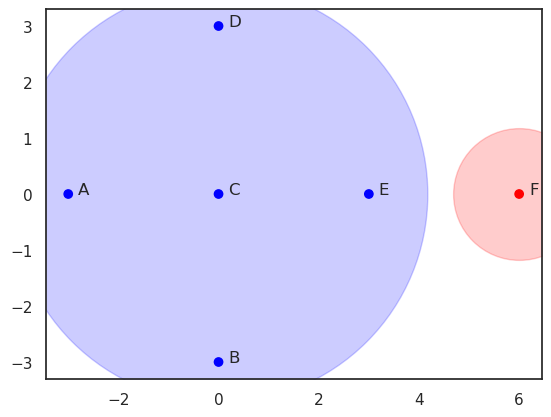

In [5]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.scatter(df['0'], df['1'], c=[['blue', 'red'][l] for l in cluster.labels_])
plt.scatter(0, 0, c='blue', alpha=0.2, s=90000)
plt.scatter(6, 0, c='red', alpha=0.2, s=9000)
for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()

As expected, DBSCAN found one cluster (blue) and one point of noise (red).


## Proving Someone Has Bad Handwriting

Let's say your friend has aweful handwriting.
You (as a good friend) want to help out, but:

*   *They will only work on their handwriting if you can prove their handwriting is bad.*

One way to do this is to cluster readable handwriting from other people using DBSCAN.

The idea is: If your friend struggles to properly write a specific character, it will either:

1.  Be marked as noise by `DBSCAN`.
2.  Be grouped with a different kind of character
    *   For example, if your friend wrote a "5" but it's grouped with "4"s, then it's probably not a very well-written 5.

Our pipeline will be as follows:

1.  Load and Scale the data.
2.  Apply `TSNE` algorithm.
    *   To overly simplify, `TSNE` reduces the dimension of data such that similar data is closer together.
3.  Apply `DBSCAN` algorithm.
4.  Visualize our categorized data and show how dissimilar our friend's handwriting is.


First, we handwritten data we gathered from our friend's math assignment:


In [6]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/012.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0,0,0,0,16,13,14,14,0,0,...,0,0,0,11,15,14,14,0,0,0
1,0,16,10,0,0,0,0,0,0,0,...,14,0,0,0,0,-1,2,13,7,1
2,0,12,14,6,5,3,0,0,0,16,...,0,0,10,11,0,0,2,14,8,2


Let's visualize our data using `matplotlib`,

We will need to reshape the data into 8x8 images, so matplotlib can properly display it:


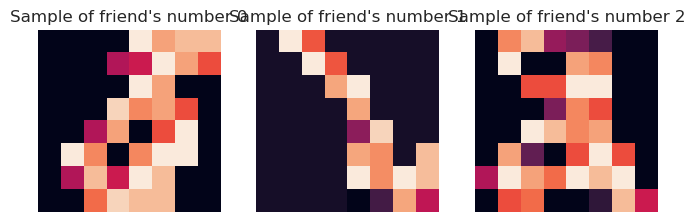

In [7]:
friend_digits = df.iloc[:, df.columns != 'y'].to_numpy()
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in friend_digits)
c = 3
fig, ax = plt.subplots(1, c, sharex='col', sharey='row')
for j in range(c):
    ax[j].axis('off')
    ax[j].set_title(f'Sample of friend\'s number {j}')
    ax[j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Next, we import the a dataset of digits from `sklearn` based on the MNIST dataset.
This data contains handwritten numbers from hundreds individuals across the United States:


In [8]:
# Load the data
digits, y = load_digits(return_X_y=True)
pd.DataFrame(digits).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Let's visualize our data using `matplotlib`:


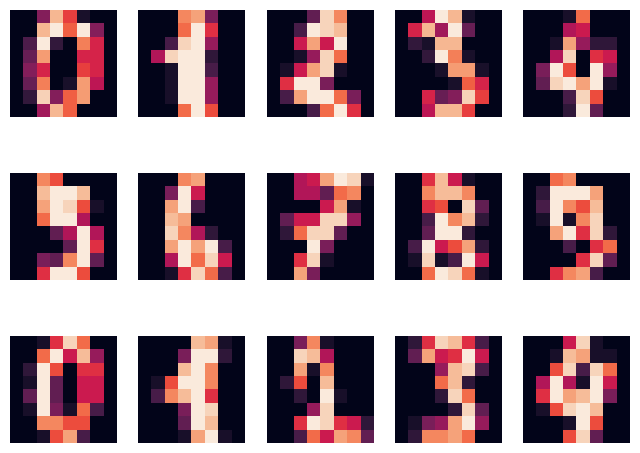

In [9]:
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in digits)
r, c = 3, 5
fig, ax = plt.subplots(r, c, sharex='col', sharey='row')
for i in range(r):
    for j in range(c):
        ax[i, j].axis('off')
        ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Now we create the dataset for our pipeline, containing *both* MNIST and our friend's digits:


In [10]:
# Use np.r_ to concatenate two rows:
data = np.r_[digits, friend_digits]
y = np.r_[y, df['y']]

Next, we initialize the objects for our pipeline, with our chosen hyperparameters:


In [11]:
embedding = TSNE(n_components=2,
        init="pca",
        n_iter=500,
        n_iter_without_progress=150,
        perplexity=10,
        random_state=0)

In [12]:
e_data = embedding.fit_transform(data)

Our data after applying `TSNE` algorithm:


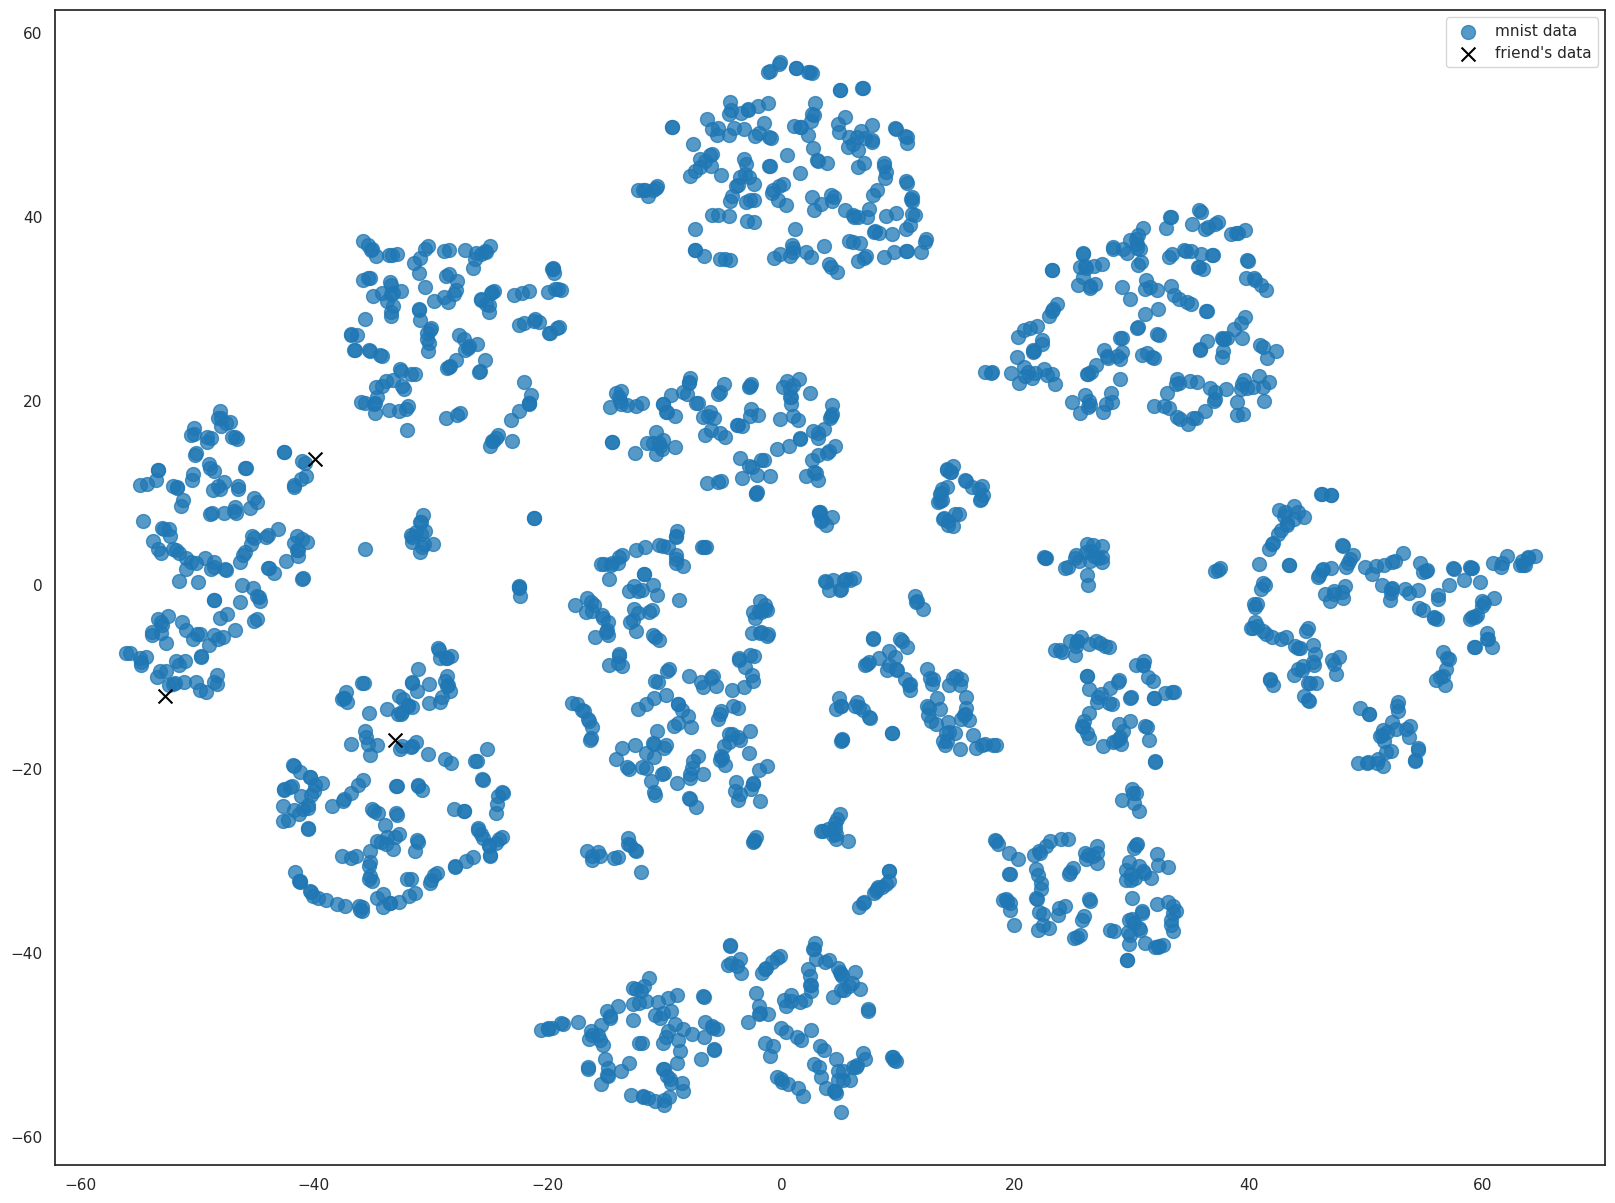

In [13]:
plt.rcParams['figure.figsize'] = (20,15)
n = friend_digits.shape[0]
plt.scatter(
    e_data[:-n, 0],
    e_data[:-n, 1],
    marker='o',
    alpha=0.75,
    label='mnist data',
    s=100)
plt.scatter(
    e_data[-n:, 0],
    e_data[-n:, 1],
    marker='x',
    color='black',
    label='friend\'s data',
    alpha=1,
    s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Next, we apply DBSCAN, using our chosen hyperparameters:


In [14]:
cluster = DBSCAN(eps=5, min_samples=20)
cluster.fit(e_data)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 14 clusters and 93 points of noise.


Let's visualize our data again, categorized by DBSCAN:


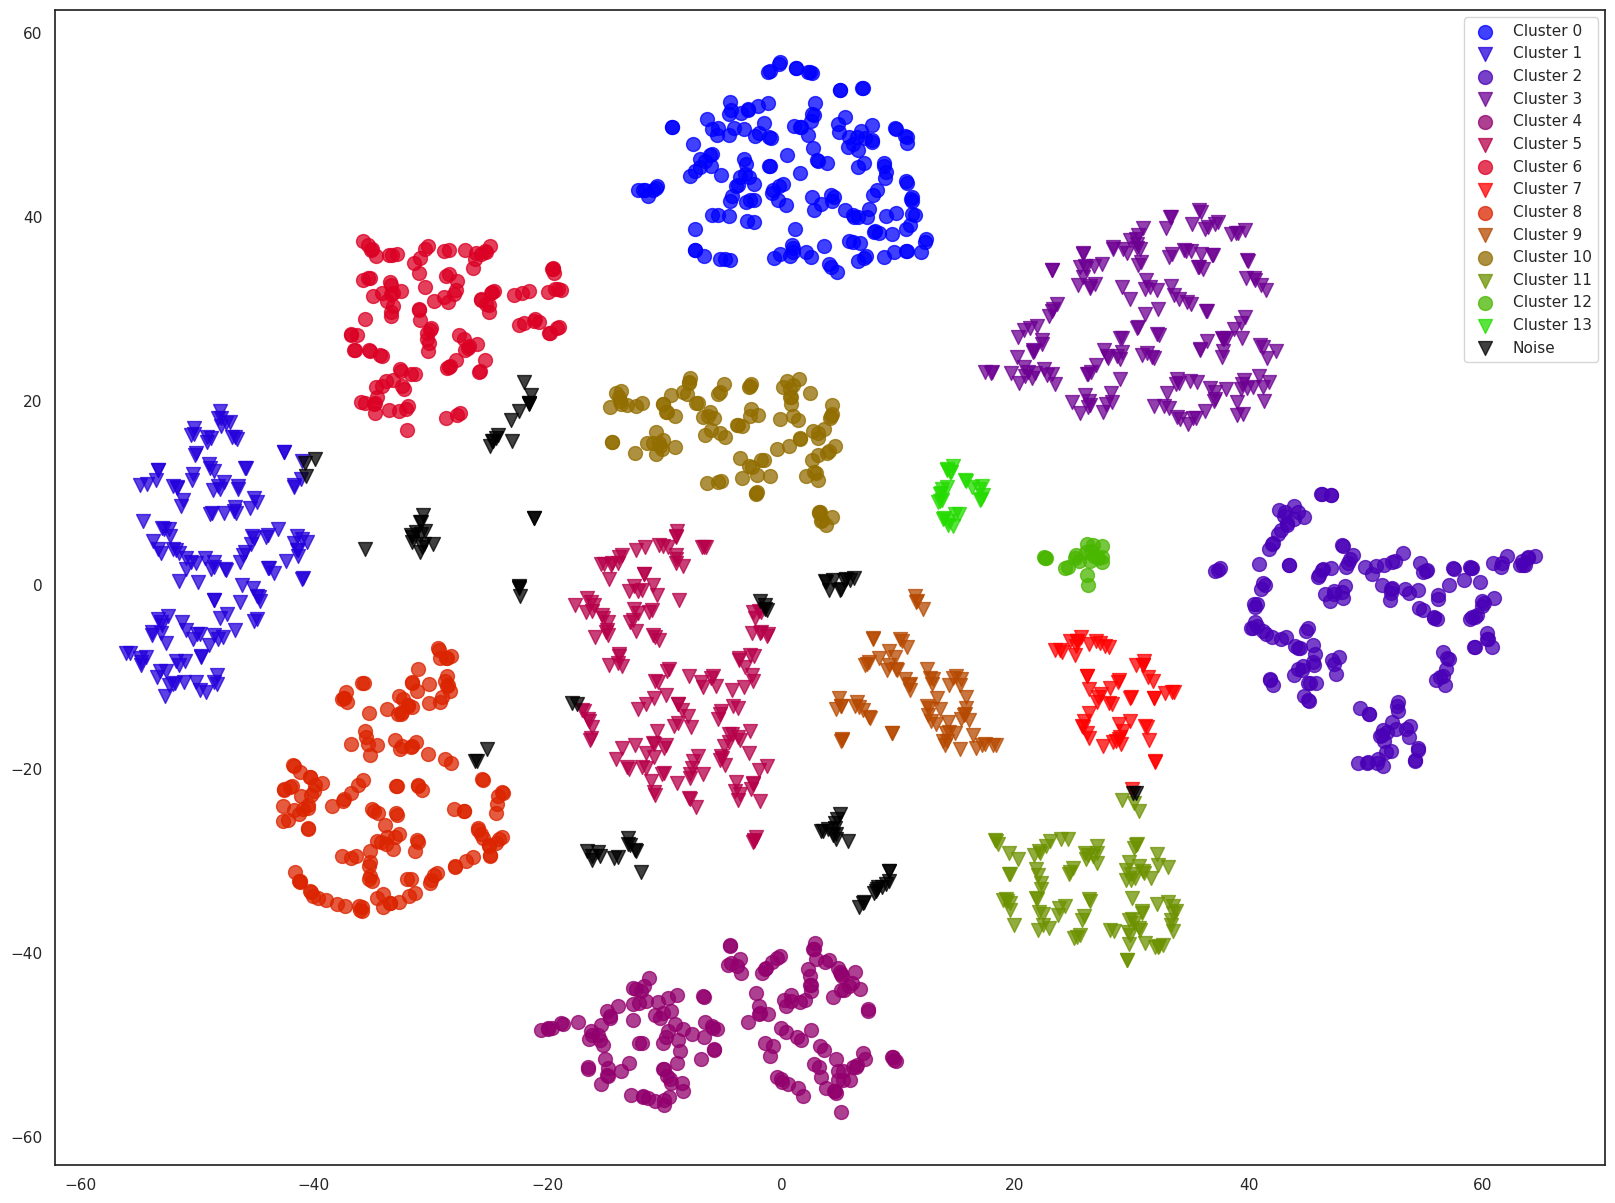

In [15]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[cluster.labels_ == l, 0],
        e_data[cluster.labels_ == l, 1],
        c=[cmap(l) if l >= 0 else 'Black'],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [16]:
print("The predicted labels of our friend's handwriting:")
print(cluster.labels_[-3:])

The predicted labels of our friend's handwriting:
[-1  8  1]


Let's see how our pipeline categorized some of the data in its original, handwritten form:


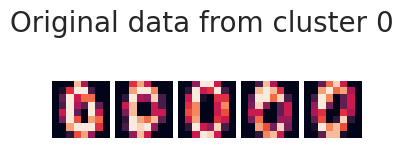

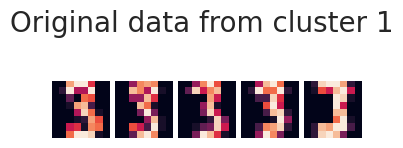

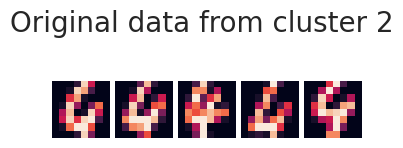

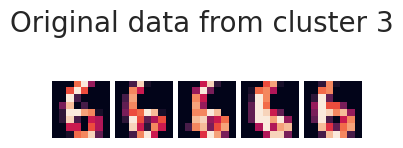

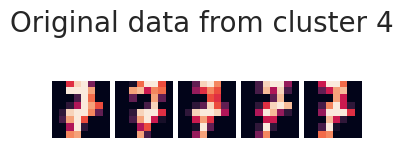

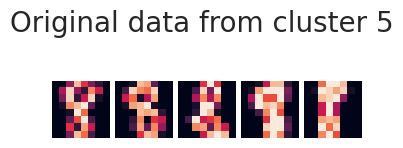

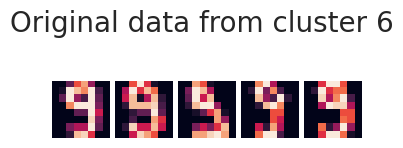

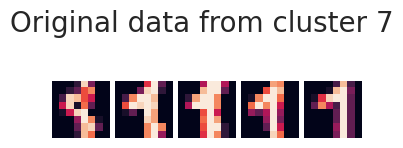

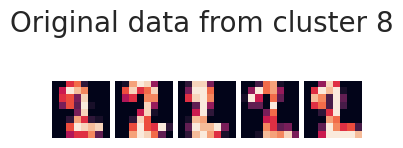

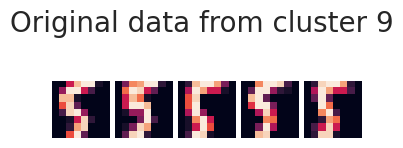

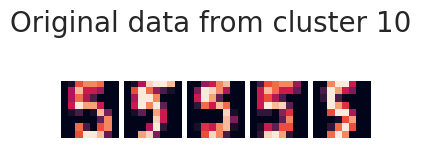

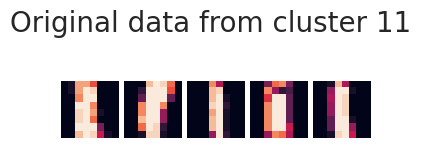

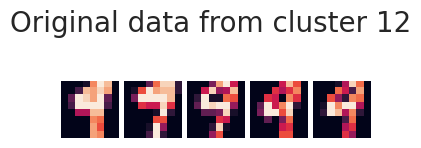

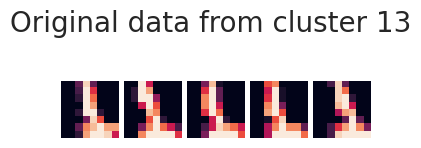

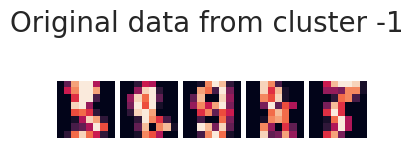

In [17]:
r, c = 1, 5
plt.rcParams['figure.figsize'] = (4*r,4*c)
for label in unique_labels:
    cluster_data = data[cluster.labels_ == label]
    nums = cluster_data[np.random.choice(len(cluster_data), r * c, replace=False)]
    it = (x.reshape(8, 8) for x in nums)
    fig, ax = plt.subplots(r, c)
    ax = ax.reshape(r, c)
    plt.subplots_adjust(wspace=0.1, hspace=-0.69)
    fig.suptitle(f'Original data from cluster {label}', fontsize=20, y=0.545)
    for i in range(r):
        for j in range(c):
            ax[i, j].axis('off')
            ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In this case we do have the original labels,

Let's compare `DBSCAN`'s clusters to the actual labels:


Correct labels:


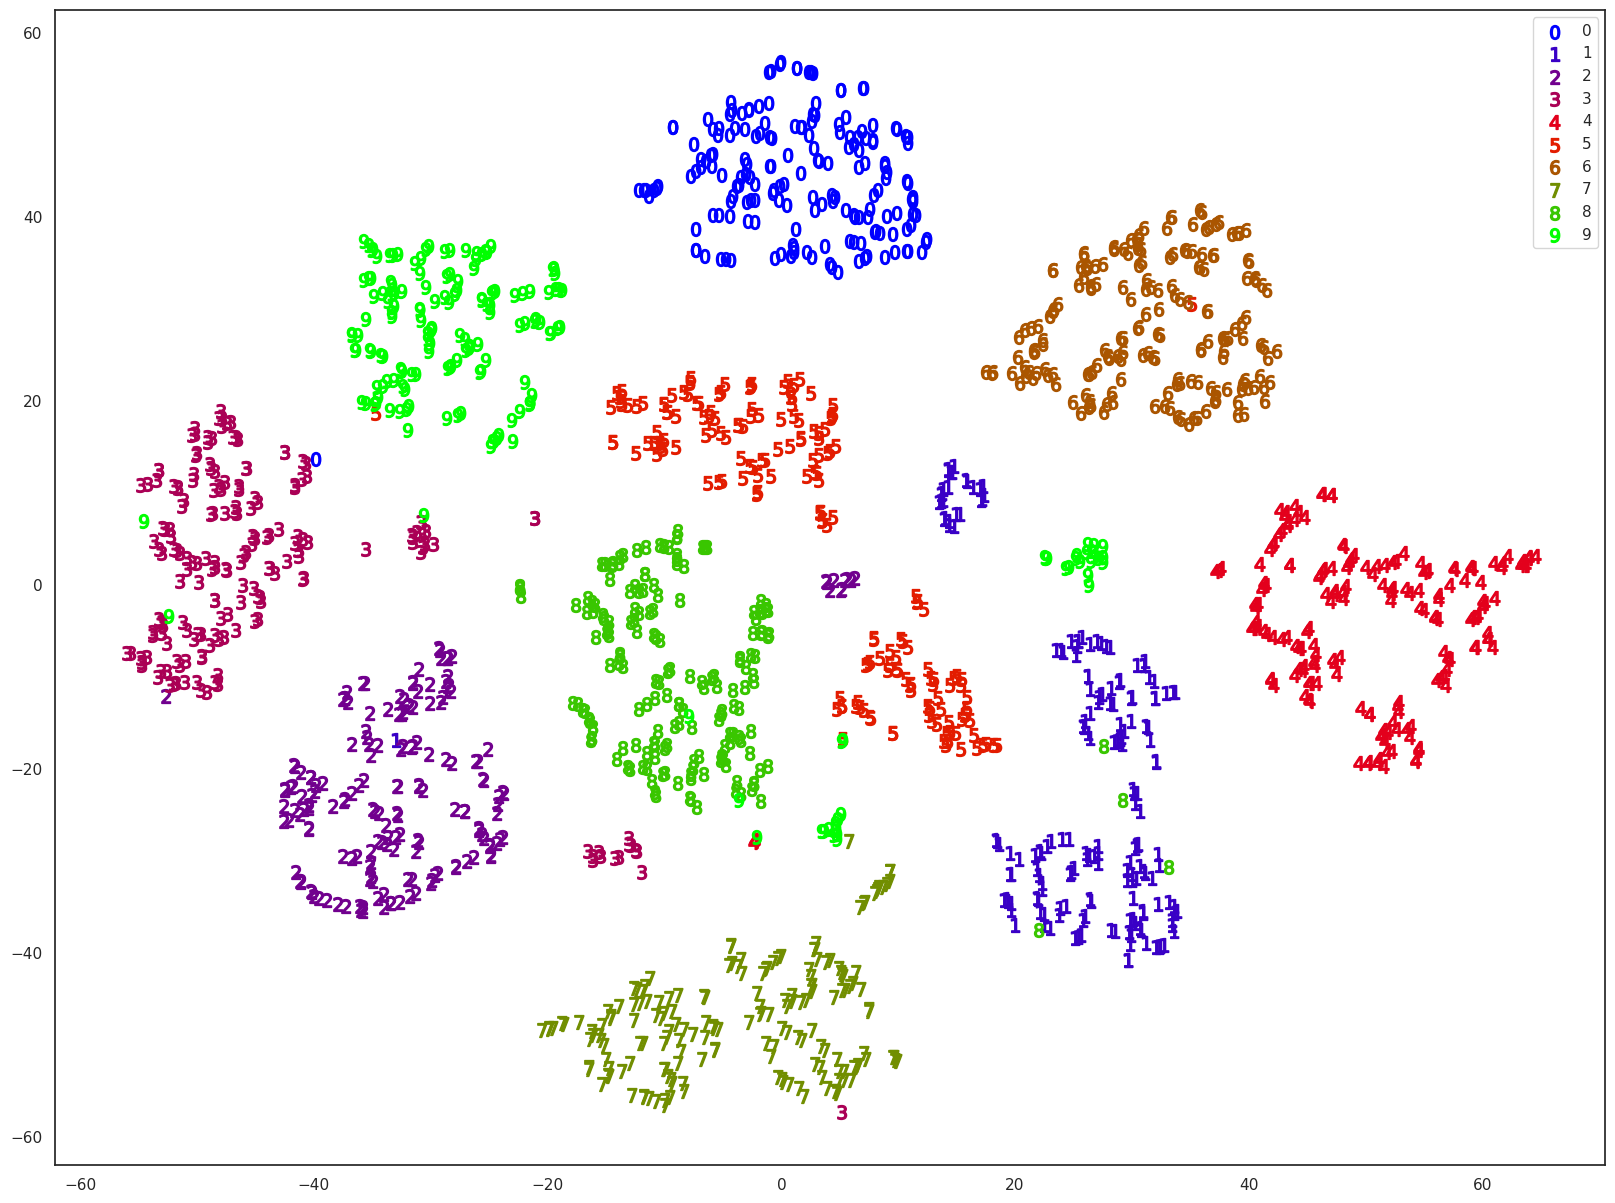

In [18]:
print('Correct labels:')
plt.rcParams['figure.figsize'] = (20,15)

unique_labels = set(y)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[y == l, 0],
        e_data[y == l, 1],
        c=[cmap(l)],
        marker=f'${l}$',
        alpha=1,
        label=f'{l}',
        s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

Finally, we can prove our friend's handwriting is unreadable (even for state-of-the-art unsupervised algorithms):


In [19]:
for i, (l, t) in enumerate(zip(cluster.labels_[-3:], y[-3:])):
    print('-' * 30)
    print(f'Your friend\'s {i}th sample was categorized as being in cluster #{l}')
    if l == -1:
        print('(IE: Noise)')
    else:
        v, c = np.unique(y[cluster.labels_ == l], return_counts=True)
        mfreq = v[np.argmax(c)]
        ratio = c.max() / c.sum()
        print(f'Cluster {l} is {ratio * 100:.2f}% the number {mfreq}')

    print(f'Your friend\'s {i}th sample is supposed to be the number {t}')

------------------------------
Your friend's 0th sample was categorized as being in cluster #-1
(IE: Noise)
Your friend's 0th sample is supposed to be the number 0
------------------------------
Your friend's 1th sample was categorized as being in cluster #8
Cluster 8 is 99.39% the number 2
Your friend's 1th sample is supposed to be the number 1
------------------------------
Your friend's 2th sample was categorized as being in cluster #1
Cluster 1 is 98.06% the number 3
Your friend's 2th sample is supposed to be the number 2


As you can see, all our friend's data was either categorized as noise, or put in a category where the vast majority is a different number.


# Exercises

In this section, you can practice using `DBSCAN` by applying the algorithm on different datasets.

Please run the following code to acquire the dataset for the exercises:


In [20]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
df.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


Here's what the data looks like:


In [ ]:
plt.scatter(df['x'], df['y'])
plt.show()

## Exercise 1 - Find the number of clusters

Find the number of clusters with:

*   `eps=2`
*   `min_samples=10`

(Not including noise).


In [ ]:
# TODO


<details>
    <summary>Click Here For a Sample Solution</summary>

```python
cluster = DBSCAN(eps=4, min_samples=4)
cluster.fit(df)
print(len(set(cluster.labels_) - {1}))
```

</details>


## Exercise 2 - Find the % of data marked as noise

Using the fitted `DBSCAN` object from the previous exercise, find % of the data that was marked as noise:


In [ ]:
# TODO


<details>
    <summary>Click Here For a Sample Solution</summary>

```python
print(f'{100 * (cluster.labels_ == -1).sum() / len(cluster.labels_)}%')
```

</details>


## Exercise 3 - Visualize the clustered data using matplotlib.pyplot

It's very useful to visualize your clustered data when possible (i.e., when dimension is low enough);

Using `matplotlib.pyplot`, visualize the clustered data - where each cluster has its own assigned color.


In [ ]:
# TODO


<details>
    <summary>Click Here For a Sample Solution</summary>

```python
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        df['x'][cluster.labels_ == l],
        df['y'][cluster.labels_ == l],
        c=[cmap(l)],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
```

</details>


## Authors


[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By     | Change Description          |
| ----------------- | ------- | -------------- | --------------------------- |
| 2021-12-20        | 0.1     | Sam Prokopchuk | Complete Exercises' content |
| 2022-05-20        | 0.2     | Roxanne Li     | Review and edit             |
| 2022-07-18        | 0.2     | Svitlana K     | Review and edit             |


Copyright © 2021 IBM Corporation. All rights reserved.
